#  I Linear Regression

a1 is 716.92259712689
a2 is 0.3473285142327989
a3 is 0.8013744571920074
a4 is 0.7391543682611526


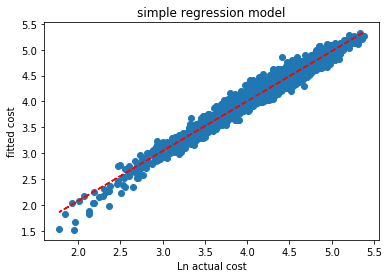

In [3]:
import pandas as pd
import math
import numpy as np
import statsmodels.api as sm
import pylab
import matplotlib.pyplot as plt



#read data
market_impact=pd.read_csv('market_impact.csv')


#ln
def ln(x):
    return np.log(x)
for i in market_impact.columns.values[3:7]:
    market_impact['ln '+str(i)]= market_impact[i].map(ln)
market_impact.iloc[:,7:10]

#REGRESION
x = market_impact.iloc[:,7:10]
x = sm.add_constant(x)
y = market_impact['ln Actual Cost']
regr=sm.OLS(y,x)
res=regr.fit()

res.tvalues[0]
y_fitted = res.fittedvalues
SeY=np.sqrt(np.sum(np.square(y_fitted-y))/(res.nobs-res.df_model-1))
SeY

#alpha
Alpha1=math.exp(res.params['const']+0.5*SeY)
Alpha2=res.params[1]
Alpha3=res.params[2]
Alpha4=res.params[3]
print ('a1 is '+str(Alpha1))
print ('a2 is '+str(Alpha2))
print ('a3 is '+str(Alpha3))
print ('a4 is '+str(Alpha4))

#plot
pylab.plot(y,y_fitted,'o')
z=np.polyfit(y,y_fitted,1)
p=np.poly1d(z)
pylab.plot(y,p(y),'r--')
pylab.title('simple regression model')
plt.xlabel('Ln actual cost')
plt.ylabel('fitted cost')
plt.show()

#  II NON- Linear Regression

a1 is 731.4348255835947
a2 is 0.798637541620763
a3 is 0.8065381407843388
a4 is 0.34767055315894874
b1 is 1.0010277785735417


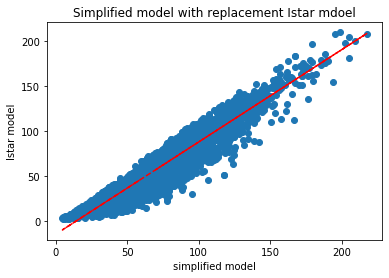

In [4]:
from scipy.optimize import leastsq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
market=pd.read_csv('market_impact.csv')

# define function
def fun(p,pov,size,vol):
  
    a1,a2,a3,a4,b1 = p    
    return (a1*size**a2*vol**a3)*(b1*pov**a4+(1-b1))

#define f(x)
def err(p, pov,size,vol, y):
    return fun(p,pov,size,vol) - y1

#def start point
p0 = [778,0.2,0.2,0.2,0.2]



size = np.array(market.iloc[:,3]) 
vol = np.array(market.iloc[:,4]) 
pov = np.array(market.iloc[:,5])    
y1 = np.array(market.iloc[:,6])

parameter = leastsq(err, p0, args=(size,vol,pov,y1))

print ('a1 is '+str(parameter[0][0]))
print ('a2 is '+str(parameter[0][1]))
print ('a3 is '+str(parameter[0][2]))
print ('a4 is '+str(parameter[0][3]))
print ('b1 is '+str(parameter[0][4]))

#get dots for both methods
simplified=[]
istar=[]
for i in range(0,len(market)): 
    simplified.append(716.92259712689*size[i]**0.3473285142327989*vol[i]**0.8013744571920074*pov[i]**0.7391543682611526)
    istar.append(parameter[0][0]*size[i]**parameter[0][1]*vol[i]**parameter[0][2]\
                 *(parameter[0][4]*pov[i]**parameter[0][3]+(1-parameter[0][4])))
simplified=np.array(simplified)
istar=np.array(istar)


#plot
pylab.plot(simplified,istar,'o')
z=np.polyfit(simplified,istar,1)
p=np.poly1d(z)
pylab.plot(simplified,p(simplified),'r--')
pylab.title('Simplified model with replacement Istar mdoel')
plt.xlabel('simplified model')
plt.ylabel('Istar model')
plt.show()

# III With Replacement

E:\anaconda\lib\site-packages\scipy\optimize\minpack.py:454: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)


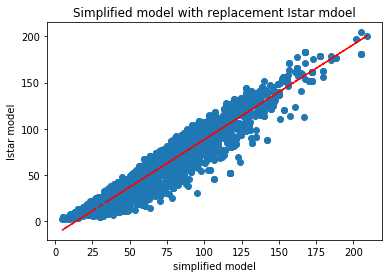

,a1,a2,a3,a4,b1
avg,738.892782,0.799363,0.807137,0.365470,0.978800
stev,10.576809,0.010505,0.009557,0.012562,0.014787
n,78.000000,78.000000,78.000000,78.000000,78.000000
t-score,69.859707,76.092626,84.457837,29.093646,66.193811


In [5]:
from scipy.optimize import leastsq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
#read data
market=pd.read_csv('market_impact.csv')
a1=[]
a2=[]
a3=[]
a4=[]
b1=[]
# sampling
for i in range (0,150):
    market_random = market.iloc[:,3:7].sample(2500,replace= True)
    def fun(p,pov,size,vol):
        a1,a2,a3,a4,b1 = p    
        return (a1*size**a2*vol**a3)*(b1*pov**a4+(1-b1))

    def err(p, pov,size,vol, y):
        return fun(p,pov,size,vol) - y
 

    p0 = [778,0.2,0.2,0.2,0.2]



    size = np.array(market_random.iloc[:,0]) 
    vol = np.array(market_random.iloc[:,1]) 
    pov = np.array(market_random.iloc[:,2])    
    y1 = np.array(market_random.iloc[:,3])

    parameter = leastsq(err, p0, args=(size,vol,pov,y1))
    if (parameter[0][0]>=100) & (parameter[0][0]<=2000)\
        & (parameter[0][1]>=0.25)& (parameter[0][1]<=1.25)\
            & (parameter[0][2]>=0.25)& (parameter[0][2]<=1.25)\
                & (parameter[0][3]>=0.25)& (parameter[0][3]<=1.25)\
                    & (parameter[0][4]>=0.25)& (parameter[0][4]<=1):
        
        pass
    else:
        continue
    a1.append(parameter[0][0])
    a2.append(parameter[0][1])
    a3.append(parameter[0][2])
    a4.append(parameter[0][3])
    b1.append(parameter[0][4])
    i=i+1


#plot
simplified=[]
istar=[]
for i in range(0,len(market)): 
    simplified.append(716.92259712689*size[i]**0.3473285142327989*vol[i]**0.8013744571920074*pov[i]**0.7391543682611526)
    istar.append(parameter[0][0]*size[i]**parameter[0][1]*vol[i]**parameter[0][2]\
                 *(parameter[0][4]*pov[i]**parameter[0][3]+(1-parameter[0][4])))
simplified=np.array(simplified)
istar=np.array(istar)

pylab.plot(simplified,istar,'o')
z=np.polyfit(simplified,istar,1)
p=np.poly1d(z)
pylab.plot(simplified,p(simplified),'r--')
pylab.title('Simplified model with replacement Istar mdoel')
plt.xlabel('simplified model')
plt.ylabel('Istar model')
plt.show()

data={'a1':{'avg':np.mean(a1),'stev':np.std(a1),'n':np.size(a1),'t-score':(np.mean(a1)/np.std(a1))}\
                  ,'a2':{'avg':np.mean(a2),'stev':np.std(a2),'n':np.size(a2),'t-score':(np.mean(a2)/np.std(a2))}\
                      ,'a3':{'avg':np.mean(a3),'stev':np.std(a3),'n':np.size(a3),'t-score':(np.mean(a3)/np.std(a3))}\
                          ,'a4':{'avg':np.mean(a4),'stev':np.std(a4),'n':np.size(a4),'t-score':(np.mean(a4)/np.std(a4))}\
                              ,'b1':{'avg':np.mean(b1),'stev':np.std(b1),'n':np.size(b1),'t-score':(np.mean(b1)/np.std(b1))}}
data=pd.DataFrame(data)
data
    